___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.__version__

'2.9.1'

In [3]:
df0 = pd.read_csv("Churn_Modelling.csv")
df = df0.copy()

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.shape

(10000, 14)

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe().T   # I am comparing mean and std deviations, outlier is not visible

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


0    7963
1    2037
Name: Exited, dtype: int64

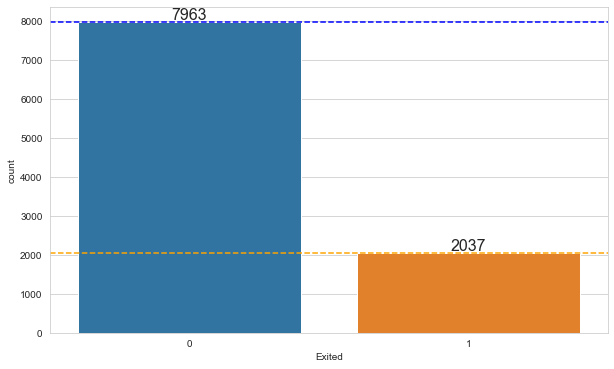

In [8]:
display(df.Exited.value_counts())       # I am looking at class distribution in classification problems, I see imbalanced data
ax = sns.countplot(x=df["Exited"])      # I will decide whether to apply the imbalanced techniques or not by looking at the scores
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Exited.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Exited.value_counts()[0], color='blue', linestyle='--');

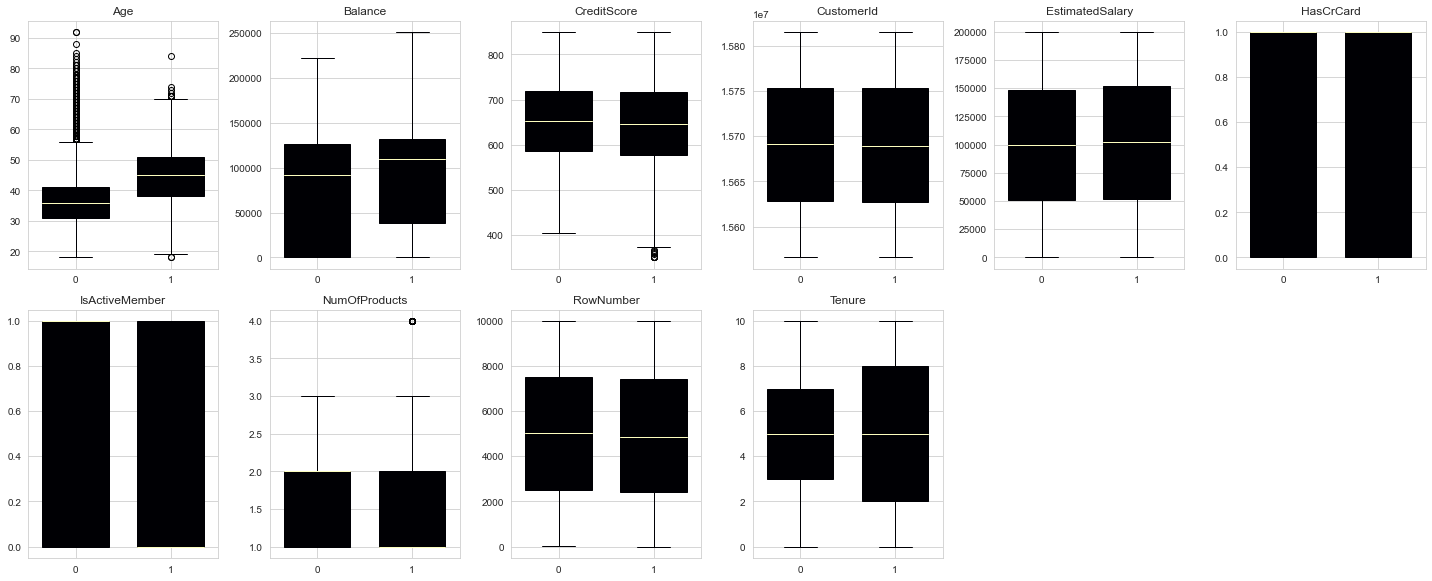

In [9]:
df.plot(kind="box",
        by="Exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

# When determining the outlier in classification problems, we should look at the class basis!
# Outlier is not visible as we see in describe()

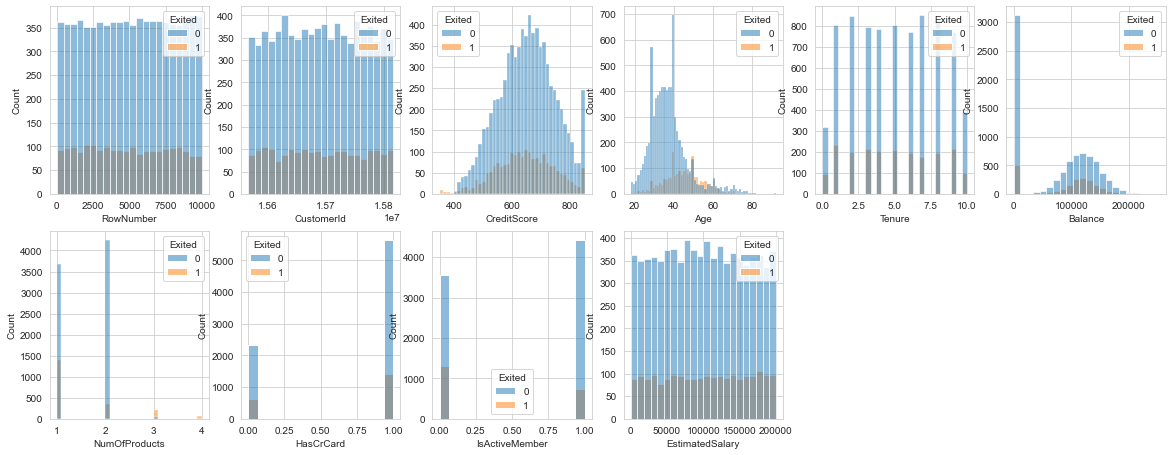

In [10]:
plt.figure(figsize=(20, 20))      # Let's see which feature separates the classes better
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue='Exited')

In [11]:
# There are features that do not separate the classes well--> RowNumber, Customerid, EstimatedSalary
# Here I will eliminate these features to gain speed because my model may not be able to extract anything from these features
# I will also delete the Surname feature

In [12]:
drop_list = ["RowNumber", "CustomerId", "EstimatedSalary", "Surname"]

In [13]:
df.shape

(10000, 14)

In [14]:
df1 = df.drop(drop_list, axis=1).copy()

In [15]:
df1.shape

(10000, 10)

In [16]:
df1 = pd.get_dummies(df1, columns=['Geography', 'Gender'], drop_first=True)
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,1,0,0,0
1,608,41,1,83807.860,1,0,1,0,0,1,0
2,502,42,8,159660.800,3,1,0,1,0,0,0
3,699,39,1,0.000,2,0,0,0,0,0,0
4,850,43,2,125510.820,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,0,0,0,1
9996,516,35,10,57369.610,1,1,1,0,0,0,1
9997,709,36,7,0.000,1,0,1,1,0,0,0
9998,772,42,3,75075.310,2,1,0,1,1,0,1


# Preprocessing of Data
- Train | Test Split, Scalling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [18]:
X = df1.drop('Exited', axis=1)
y = df1['Exited']

In [19]:
seed = 13

In [20]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=seed 
)

# Considering the distribution ratio of the classes, I separated this train data and test data

X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1, random_state=seed 
)

# Considering the distribution ratio of the classes, I separated this train data and validation data

In [21]:
scaler = MinMaxScaler()  # Since there are no outlier values, I will use the min max scaler

In [22]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

### Create The Model

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [24]:
X_train.shape

(8100, 10)

In [25]:
X_val.shape

(900, 10)

In [26]:
X_test.shape

(1000, 10)

In [27]:
model = Sequential()

model.add(Dense(36, activation = "relu",input_dim = X_train.shape[1]))  # I used relu because learning is more
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))  # I used sigmoid because the output is binary 

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])  # the weights will be updated accordingly

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                396       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,243
Trainable params: 1,243
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(10, 36) dtype=float32, numpy=
 array([[ 0.05180496, -0.3232954 ,  0.0449861 , -0.2389617 , -0.27182084,
          0.3200356 , -0.3352465 , -0.08874783, -0.29006153,  0.22173485,
          0.21379218,  0.03228879, -0.08672553, -0.12255873, -0.03129822,
         -0.34932676, -0.20367019,  0.06891426, -0.26738128,  0.3290684 ,
         -0.19094336, -0.22577798, -0.32392994,  0.28063664,  0.28089407,
          0.02924785,  0.23224577, -0.33408856,  0.35880265,  0.25479147,
          0.22210982, -0.21812922,  0.19946   , -0.35760835,  0.33738366,
         -0.29385048],
        [-0.23033845,  0.10623342, -0.16062976,  0.22766301,  0.26730135,
         -0.11257389, -0.29832846,  0.17914096, -0.33545652, -0.20175233,
          0.07943943,  0.30295607, -0.02486253, -0.21378633, -0.15455364,
          0.01971093, -0.25645882, -0.27763015,  0.32236895,  0.16869393,
          0.23222455, -0.3023232 , -0.330662  , -0.07781357, -0.3162483 ,
         -0.01491472,

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [31]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          verbose=1,callbacks = [early_stop])


#  validation_data=(X_val, y_val) I'm using the validation data I reserved above

Epoch 1/600
254/254 [==============================] - 1s 1ms/step - loss: 0.4875 - accuracy: 0.7958 - val_loss: 0.4530 - val_accuracy: 0.7978
Epoch 2/600
254/254 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.8081 - val_loss: 0.4018 - val_accuracy: 0.8256
Epoch 3/600
254/254 [==============================] - 0s 823us/step - loss: 0.3939 - accuracy: 0.8314 - val_loss: 0.3670 - val_accuracy: 0.8433
Epoch 4/600
254/254 [==============================] - 0s 810us/step - loss: 0.3703 - accuracy: 0.8441 - val_loss: 0.3534 - val_accuracy: 0.8444
Epoch 5/600
254/254 [==============================] - 0s 802us/step - loss: 0.3600 - accuracy: 0.8493 - val_loss: 0.3515 - val_accuracy: 0.8500
Epoch 6/600
254/254 [==============================] - 0s 808us/step - loss: 0.3585 - accuracy: 0.8511 - val_loss: 0.3477 - val_accuracy: 0.8511
Epoch 7/600
254/254 [==============================] - 0s 803us/step - loss: 0.3551 - accuracy: 0.8533 - val_loss: 0.3450 - val_accura

In [32]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.488,0.796,0.453,0.798
1,0.440,0.808,0.402,0.826
2,0.394,0.831,0.367,0.843
3,0.370,0.844,0.353,0.844
4,0.360,0.849,0.351,0.850


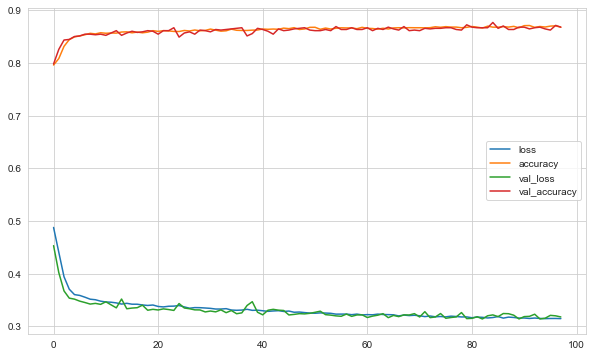

In [33]:
loss_df.plot(subplots=())
plt.show()

In [34]:
model.evaluate(X_test, y_test, verbose=0)

[0.3656381368637085, 0.8529999852180481]

In [35]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3656381368637085
accuracy :  0.8529999852180481


In [36]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 554us/step
[[750  46]
 [101 103]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       796
           1       0.69      0.50      0.58       204

    accuracy                           0.85      1000
   macro avg       0.79      0.72      0.75      1000
weighted avg       0.84      0.85      0.84      1000



## learning rate

In [37]:
from tensorflow.keras.optimizers import Adam

In [38]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.005)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [39]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [40]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
254/254 [==============================] - 1s 1ms/step - loss: 0.4602 - accuracy: 0.8021 - val_loss: 0.4068 - val_accuracy: 0.8233
Epoch 2/600
254/254 [==============================] - 0s 885us/step - loss: 0.3963 - accuracy: 0.8340 - val_loss: 0.3801 - val_accuracy: 0.8411
Epoch 3/600
254/254 [==============================] - 0s 825us/step - loss: 0.3665 - accuracy: 0.8444 - val_loss: 0.3498 - val_accuracy: 0.8544
Epoch 4/600
254/254 [==============================] - 0s 816us/step - loss: 0.3577 - accuracy: 0.8541 - val_loss: 0.3611 - val_accuracy: 0.8467
Epoch 5/600
254/254 [==============================] - 0s 827us/step - loss: 0.3520 - accuracy: 0.8563 - val_loss: 0.3487 - val_accuracy: 0.8533
Epoch 6/600
254/254 [==============================] - 0s 829us/step - loss: 0.3527 - accuracy: 0.8531 - val_loss: 0.3411 - val_accuracy: 0.8644
Epoch 7/600
254/254 [==============================] - 0s 813us/step - loss: 0.3464 - accuracy: 0.8560 - val_loss: 0.3414 - val_accu

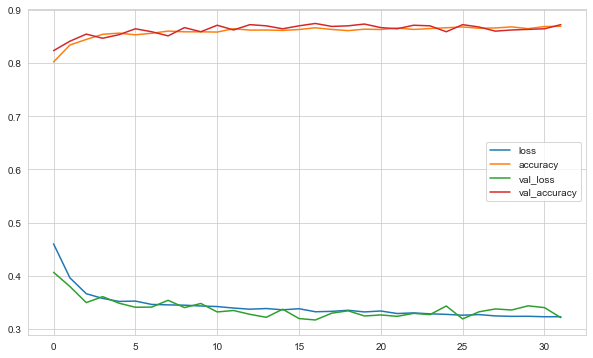

In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=())
plt.show()

In [42]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3675055205821991
accuracy :  0.8460000157356262


In [43]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 542us/step
[[757  39]
 [115  89]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.70      0.44      0.54       204

    accuracy                           0.85      1000
   macro avg       0.78      0.69      0.72      1000
weighted avg       0.83      0.85      0.83      1000



## Dropout

In [44]:
from tensorflow.keras.layers import Dropout

# Dropout is a regularization technique

In [45]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [46]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
254/254 [==============================] - 1s 1ms/step - loss: 0.6060 - accuracy: 0.7191 - val_loss: 0.5097 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 0s 866us/step - loss: 0.5322 - accuracy: 0.7954 - val_loss: 0.4829 - val_accuracy: 0.7967
Epoch 3/600
254/254 [==============================] - 0s 864us/step - loss: 0.5161 - accuracy: 0.7957 - val_loss: 0.4655 - val_accuracy: 0.7967
Epoch 4/600
254/254 [==============================] - 0s 842us/step - loss: 0.4987 - accuracy: 0.7954 - val_loss: 0.4632 - val_accuracy: 0.7967
Epoch 5/600
254/254 [==============================] - 0s 836us/step - loss: 0.4946 - accuracy: 0.7967 - val_loss: 0.4582 - val_accuracy: 0.7967
Epoch 6/600
254/254 [==============================] - 0s 846us/step - loss: 0.4825 - accuracy: 0.7983 - val_loss: 0.4498 - val_accuracy: 0.7967
Epoch 7/600
254/254 [==============================] - 0s 838us/step - loss: 0.4728 - accuracy: 0.7983 - val_loss: 0.4383 - val_accu

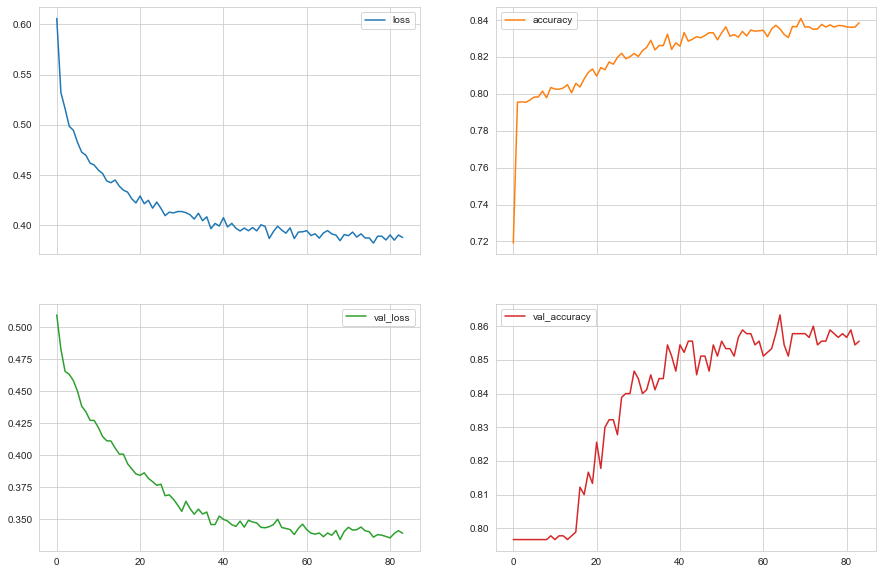

In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,2),figsize=(15,10))
plt.show()

In [48]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3700076639652252
accuracy :  0.8519999980926514


In [49]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 540us/step
[[775  21]
 [127  77]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.79      0.38      0.51       204

    accuracy                           0.85      1000
   macro avg       0.82      0.68      0.71      1000
weighted avg       0.84      0.85      0.83      1000



## L1 and L2 Regularizations(Weight Decay)

In [50]:
from tensorflow.keras.regularizers import l1, l2, L1L2

In [51]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3),
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l1(1e-5), 
                input_dim=X_train.shape[1]))

model.add(Dense(18, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3), 
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l1(1e-5)))

model.add(Dense(9, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3), 
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l1(1e-5)))


model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [52]:
model.fit(x=X_train,
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          callbacks=[early_stop],
          verbose=1
)

Epoch 1/600
254/254 [==============================] - 1s 1ms/step - loss: 0.6704 - accuracy: 0.7963 - val_loss: 0.5771 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 0s 918us/step - loss: 0.5480 - accuracy: 0.7963 - val_loss: 0.5209 - val_accuracy: 0.7967
Epoch 3/600
254/254 [==============================] - 0s 902us/step - loss: 0.5125 - accuracy: 0.7963 - val_loss: 0.4964 - val_accuracy: 0.7967
Epoch 4/600
254/254 [==============================] - 0s 888us/step - loss: 0.4947 - accuracy: 0.8025 - val_loss: 0.4875 - val_accuracy: 0.8089
Epoch 5/600
254/254 [==============================] - 0s 909us/step - loss: 0.4844 - accuracy: 0.8089 - val_loss: 0.4782 - val_accuracy: 0.8100
Epoch 6/600
254/254 [==============================] - 0s 885us/step - loss: 0.4772 - accuracy: 0.8084 - val_loss: 0.4733 - val_accuracy: 0.8067
Epoch 7/600
254/254 [==============================] - 0s 886us/step - loss: 0.4734 - accuracy: 0.8099 - val_loss: 0.4666 - val_accu

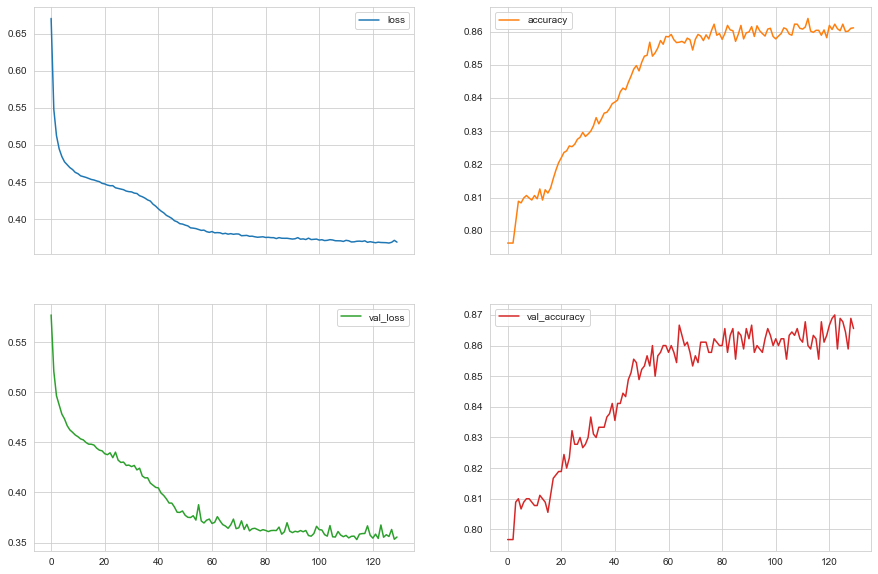

In [53]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"], ["accuracy","val_accuracy"]], layout=(2,2), figsize=(15,10))
plt.show()

In [54]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.39857831597328186
accuracy:  0.8460000157356262


In [55]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 541us/step
[[759  37]
 [117  87]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.70      0.43      0.53       204

    accuracy                           0.85      1000
   macro avg       0.78      0.69      0.72      1000
weighted avg       0.83      0.85      0.83      1000



32/32 [==============================] - 0s 545us/step


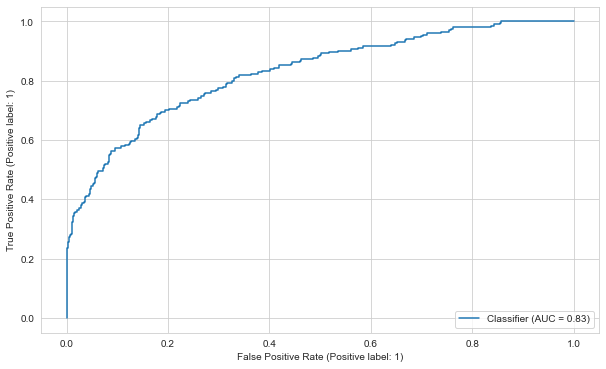

In [56]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [57]:
roc_auc_score(y_test, y_pred_proba)

0.8273659966499163

In [58]:
model.save("l1l2_model.h5")

## Cross Validation

In [59]:
from sklearn.model_selection import cross_validate
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [60]:
def build_classifier():
    tf.keras.utils.set_random_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return classifier

In [61]:
classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

# classifier_model'i sklearndeki bir classifaciton algoritması olarak kullanabiliriz artık !

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

# 

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores

26/26 [==============================] - 0s 499us/step


,test_accuracy,test_precision,test_recall,test_f1
1,0.867,0.794,0.467,0.588
2,0.840,0.714,0.385,0.500
3,0.858,0.713,0.432,0.538
4,0.865,0.798,0.438,0.566
5,0.857,0.791,0.426,0.554
6,0.869,0.702,0.493,0.579
7,0.843,0.770,0.425,0.548
8,0.860,0.747,0.430,0.546
9,0.854,0.689,0.512,0.587
10,0.863,0.815,0.492,0.613


In [62]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

,score_mean,score_std
acc,0.858,0.010
pre,0.753,0.046
rec,0.450,0.039
f1,0.562,0.032


## Optuna

In [63]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.regularizers import l1, l2, L1L2

In [64]:
import optuna

In [65]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [66]:
trial_metric = "Accuracy"
batch_size = 64

# batch_size = 64 model biraz daha hızlı eğitilsin diye batch_size'ı 32'den 64'e çıkardık

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 64, 128) # ilk layerda kaç tane nöron olsun 64'ten 128'e kadar dene diyoruz
    n_units2 = trial.suggest_int("n_units2", 16, 64)  # ama dikkat hepsini denemeyecek en iyiye doğru bir yönelimi olacak. 
    n_units3 = trial.suggest_int("n_units3", 16, 64)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) # optimizer olarak buradakileri dene
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    # deneyeceğimiz hyperparametrelerin uzayını belirledik.
    # modeli aynı seed'de çalıştırarak

    tf.keras.utils.set_random_seed(seed)
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2), 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   



    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5) # mimarinin içerisinde direk veremediğimiz bir hyperparametre-->(class_weight)
    w1 = trial.suggest_loguniform("w1", 0.01, 2) # daha var bunu fit içerisinde belirtebiliyoruz ondan dolayı burada tanımladık
                                                 # denenmesi için.
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=700,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

In [67]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyorum.
study.optimize(objective, n_trials=15)
display(study.best_params)

[I 2023-05-17 15:14:01,925] A new study created in memory with name: no-name-2a63106d-4ec4-4aa0-a323-024de11069be


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-17 15:14:04,446] Trial 0 finished with value: 0.7950000166893005 and parameters: {'n_units1': 122, 'n_units2': 19, 'n_units3': 28, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 3.214296473812022e-05, 'regularizer1': 0.00012013891826898272, 'regularizer2': 3.665122830372685e-05, 'dropout': 0, 'w0': 0.01912162130727256, 'w1': 0.1634133096596164}. Best is trial 0 with value: 0.7950000166893005.
[I 2023-05-17 15:15:31,165] Trial 1 finished with value: 0.7960000038146973 and parameters: {'n_units1': 79, 'n_units2': 24, 'n_units3': 19, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0007909047291894306, 'regularizer1': 0.00023910700573511745, 'regularizer2': 0.00024104857690927786, 'dropout': 0.5, 'w0': 0.07190608818795426, 'w1': 0.1022991663638936}. Best is trial 1 with value: 0.7960000038146973.
[I 2023-05-17 15:16:57,969] Trial 2 finished with value: 0.503000020980835 and parameters: {'n_units1'

Restoring model weights from the end of the best epoch: 9.
Epoch 24: early stopping


[I 2023-05-17 15:17:01,665] Trial 3 finished with value: 0.8429999947547913 and parameters: {'n_units1': 64, 'n_units2': 29, 'n_units3': 51, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.01042663412564747, 'regularizer1': 9.398650004873693e-05, 'regularizer2': 2.630004846051519e-05, 'dropout': 0.3, 'w0': 1.5648730421042634, 'w1': 0.6540541316381823}. Best is trial 3 with value: 0.8429999947547913.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-05-17 15:17:04,974] Trial 4 finished with value: 0.7960000038146973 and parameters: {'n_units1': 123, 'n_units2': 45, 'n_units3': 49, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.007471939780621984, 'regularizer1': 0.0002044493839431573, 'regularizer2': 0.0002615849594482707, 'dropout': 0.5, 'w0': 4.721151912204245, 'w1': 0.01938913096409645}. Best is trial 3 with value: 0.8429999947547913.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-05-17 15:17:09,481] Trial 5 finished with value: 0.5669999718666077 and parameters: {'n_units1': 93, 'n_units2': 61, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.00391969800015034, 'regularizer1': 4.979875321168019e-05, 'regularizer2': 6.613125128964672e-05, 'dropout': 0.3, 'w0': 0.020124869443726382, 'w1': 0.3980130679443614}. Best is trial 3 with value: 0.8429999947547913.


Restoring model weights from the end of the best epoch: 23.
Epoch 38: early stopping


[I 2023-05-17 15:22:00,663] Trial 6 finished with value: 0.20399999618530273 and parameters: {'n_units1': 116, 'n_units2': 51, 'n_units3': 21, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.051159878479219566, 'regularizer1': 3.724431494818002e-05, 'regularizer2': 0.00010130921510764287, 'dropout': 0.5, 'w0': 0.03769606524935875, 'w1': 0.34518708246923935}. Best is trial 3 with value: 0.8429999947547913.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-05-17 15:22:04,397] Trial 7 finished with value: 0.7960000038146973 and parameters: {'n_units1': 80, 'n_units2': 39, 'n_units3': 60, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.08225133780680535, 'regularizer1': 0.00030148787428468303, 'regularizer2': 4.2404212910146317e-05, 'dropout': 0.3, 'w0': 3.3388741559669968, 'w1': 0.11362207764790835}. Best is trial 3 with value: 0.8429999947547913.


Restoring model weights from the end of the best epoch: 17.
Epoch 32: early stopping


[I 2023-05-17 15:22:09,407] Trial 8 finished with value: 0.8519999980926514 and parameters: {'n_units1': 123, 'n_units2': 32, 'n_units3': 16, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.01067104476649163, 'regularizer1': 9.678116372923235e-05, 'regularizer2': 1.718708183816689e-05, 'dropout': 0, 'w0': 0.7641536455021122, 'w1': 0.2688650977941791}. Best is trial 8 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 100.
Epoch 115: early stopping


[I 2023-05-17 15:22:26,655] Trial 9 finished with value: 0.7960000038146973 and parameters: {'n_units1': 93, 'n_units2': 47, 'n_units3': 42, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.0002289345747617669, 'regularizer1': 8.768701100355937e-05, 'regularizer2': 0.00017062737554057495, 'dropout': 0.3, 'w0': 0.3319256760194446, 'w1': 0.13394545906090852}. Best is trial 8 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 34.
Epoch 49: early stopping


[I 2023-05-17 15:22:33,472] Trial 10 finished with value: 0.8460000157356262 and parameters: {'n_units1': 109, 'n_units2': 34, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0011143354834886976, 'regularizer1': 1.3469203987839714e-05, 'regularizer2': 1.1983325674594884e-05, 'dropout': 0, 'w0': 0.5326399617490225, 'w1': 1.0188779817754667}. Best is trial 8 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-05-17 15:22:36,544] Trial 11 finished with value: 0.7490000128746033 and parameters: {'n_units1': 110, 'n_units2': 33, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0012282828759089654, 'regularizer1': 1.2752590562588885e-05, 'regularizer2': 1.0960799958809156e-05, 'dropout': 0, 'w0': 0.4000628278846704, 'w1': 1.993397297733419}. Best is trial 8 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 34.
Epoch 49: early stopping


[I 2023-05-17 15:22:43,217] Trial 12 finished with value: 0.8529999852180481 and parameters: {'n_units1': 106, 'n_units2': 36, 'n_units3': 16, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.02334664549751424, 'regularizer1': 0.000999745726076732, 'regularizer2': 1.0350484265861394e-05, 'dropout': 0, 'w0': 0.7435171566170723, 'w1': 1.4772755060805662}. Best is trial 12 with value: 0.8529999852180481.


Restoring model weights from the end of the best epoch: 21.
Epoch 36: early stopping


[I 2023-05-17 15:22:48,568] Trial 13 finished with value: 0.847000002861023 and parameters: {'n_units1': 104, 'n_units2': 37, 'n_units3': 16, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.02049758339873287, 'regularizer1': 0.0007763265992371391, 'regularizer2': 0.0009641649678698122, 'dropout': 0, 'w0': 0.8069048815908778, 'w1': 1.6465921629664342}. Best is trial 12 with value: 0.8529999852180481.


Restoring model weights from the end of the best epoch: 57.
Epoch 72: early stopping


[I 2023-05-17 15:22:58,090] Trial 14 finished with value: 0.8450000286102295 and parameters: {'n_units1': 103, 'n_units2': 28, 'n_units3': 23, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.026116788555911978, 'regularizer1': 0.0008704313946551222, 'regularizer2': 1.885329609943422e-05, 'dropout': 0, 'w0': 1.1060043361619147, 'w1': 0.8930263947309426}. Best is trial 12 with value: 0.8529999852180481.


{'n_units1': 106,
 'n_units2': 36,
 'n_units3': 16,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam,
 'learning_rate': 0.02334664549751424,
 'regularizer1': 0.000999745726076732,
 'regularizer2': 1.0350484265861394e-05,
 'dropout': 0,
 'w0': 0.7435171566170723,
 'w1': 1.4772755060805662}

In [68]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)

tf.keras.utils.set_random_seed(seed)
model = Sequential()
model.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/500
127/127 [==============================] - 1s 2ms/step - loss: 0.5615 - Accuracy: 0.7963 - val_loss: 0.4869 - val_Accuracy: 0.7967
Epoch 2/500
127/127 [==============================] - 0s 1ms/step - loss: 0.4927 - Accuracy: 0.8038 - val_loss: 0.4806 - val_Accuracy: 0.8056
Epoch 3/500
127/127 [==============================] - 0s 984us/step - loss: 0.4820 - Accuracy: 0.8205 - val_loss: 0.4708 - val_Accuracy: 0.8178
Epoch 4/500
127/127 [==============================] - 0s 1ms/step - loss: 0.4777 - Accuracy: 0.8264 - val_loss: 0.4646 - val_Accuracy: 0.8178
Epoch 5/500
127/127 [==============================] - 0s 1ms/step - loss: 0.4738 - Accuracy: 0.8252 - val_loss: 0.4510 - val_Accuracy: 0.8322
Epoch 6/500
127/127 [==============================] - 0s 1ms/step - loss: 0.4679 - Accuracy: 0.8299 - val_loss: 0.4631 - val_Accuracy: 0.8322
Epoch 7/500
127/127 [==============================] - 0s 990us/step - loss: 0.4680 - Accuracy: 0.8253 - val_loss: 0.4461 - val_Accuracy: 0.

In [69]:
history = model.history.history

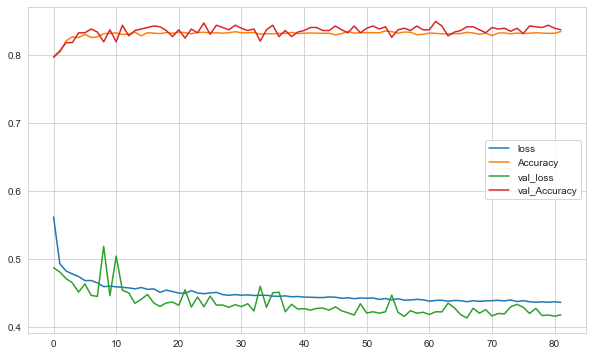

In [70]:
loss_df = pd.DataFrame(history)
loss_df.plot(subplots=())
plt.show()

In [71]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 583us/step
[[770  26]
 [141  63]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       796
           1       0.71      0.31      0.43       204

    accuracy                           0.83      1000
   macro avg       0.78      0.64      0.67      1000
weighted avg       0.82      0.83      0.81      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 559us/step


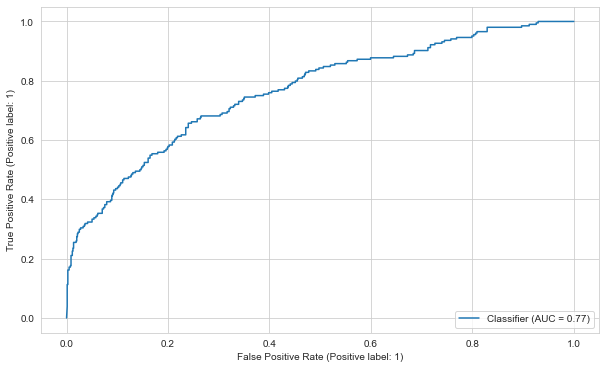

In [72]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [73]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4459468722343445
accuracy:  0.8330000042915344


In [74]:
roc_auc_score(y_test, y_pred_proba)

0.7656850428613657

# Final Model and Model Deployment

In [75]:
import pickle

pickle.dump(scaler, open("scaler_exited", 'wb'))

In [76]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 542us/step
[[770  26]
 [141  63]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       796
           1       0.71      0.31      0.43       204

    accuracy                           0.83      1000
   macro avg       0.78      0.64      0.67      1000
weighted avg       0.82      0.83      0.81      1000



In [77]:
model.save('model_exited.h5')

## Prediction

In [78]:
from tensorflow.keras.models import load_model

In [79]:
model_exited = load_model('l1l2_model.h5')

scaler_exited = pickle.load(open("scaler_exited", "rb"))

In [80]:
num_column = df1.shape[1]  # Let's get the number of columns in the DataFrame
target_column = 'Exited'   # The name of the column we want to move to the end

# Let's get the index of the column
target_column_index = df1.columns.get_loc(target_column)

# Let's move the column to the end
df1 = df1.iloc[:, [i for i in range(num_column) if i != target_column_index] + [target_column_index]]
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.000,1,1,1,0,0,0,1
1,608,41,1,83807.860,1,0,1,0,1,0,0
2,502,42,8,159660.800,3,1,0,0,0,0,1
3,699,39,1,0.000,2,0,0,0,0,0,0
4,850,43,2,125510.820,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,0,0,1,0
9996,516,35,10,57369.610,1,1,1,0,0,1,0
9997,709,36,7,0.000,1,0,1,0,0,0,1
9998,772,42,3,75075.310,2,1,0,1,0,1,1


In [86]:
random_customer = df1.sample(n=10, random_state=101).iloc[0:9, :10]

random_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
6676,619,52,8,0.000,2,1,1,0,1,1
6421,616,23,8,73112.950,1,1,1,0,0,1
9834,516,46,6,62212.290,1,0,1,0,0,0
8492,494,28,9,114731.760,2,0,1,0,0,1
9982,655,46,7,137145.120,1,1,0,1,0,0
8844,695,35,7,0.000,2,1,0,0,1,1
7247,582,40,3,110150.430,1,1,1,1,0,0
5862,682,40,4,0.000,2,1,1,0,0,1
3662,632,28,5,118890.810,1,0,1,0,0,0


In [87]:
random_customer = scaler_exited.transform(random_customer)

random_customer

array([[0.538     , 0.45945946, 0.8       , 0.        , 0.33333333,
        1.        , 1.        , 0.        , 1.        , 1.        ],
       [0.532     , 0.06756757, 0.8       , 0.29140497, 0.        ,
        1.        , 1.        , 0.        , 0.        , 1.        ],
       [0.332     , 0.37837838, 0.6       , 0.2479584 , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.288     , 0.13513514, 0.9       , 0.45728431, 0.33333333,
        0.        , 1.        , 0.        , 0.        , 1.        ],
       [0.61      , 0.37837838, 0.7       , 0.54661684, 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ],
       [0.69      , 0.22972973, 0.7       , 0.        , 0.33333333,
        1.        , 0.        , 0.        , 1.        , 1.        ],
       [0.464     , 0.2972973 , 0.3       , 0.43902459, 0.        ,
        1.        , 1.        , 1.        , 0.        , 0.        ],
       [0.664     , 0.2972973 , 0.4      

In [88]:
prediction = pd.DataFrame(model_exited.predict(random_customer) > 0.5, columns=['prediction']).astype("float64")
prediction

1/1 [==============================] - 0s 51ms/step


,prediction
0,0.000
1,0.000
2,0.000
3,0.000
4,1.000
5,0.000
6,0.000
7,0.000
8,0.000


In [91]:
actual = pd.DataFrame(df.sample(n=9, random_state=101)["Exited"]).rename({'Exited': 'actual'}, axis=1).astype("float64")
actual 

,actual
6676,0.000
6421,0.000
9834,1.000
8492,0.000
9982,1.000
8844,0.000
7247,1.000
5862,0.000
3662,0.000


In [92]:
pred_df = actual.join(prediction.set_index(actual.index))

pred_df

,actual,prediction
6676,0.000,0.000
6421,0.000,0.000
9834,1.000,0.000
8492,0.000,0.000
9982,1.000,1.000
8844,0.000,0.000
7247,1.000,0.000
5862,0.000,0.000
3662,0.000,0.000


In [93]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "TRUE" if int(x['actual'] == x['prediction']) else "FALSE", axis=1)

pred_df

,actual,prediction,prediction_accuracy
6676,0.000,0.000,TRUE
6421,0.000,0.000,TRUE
9834,1.000,0.000,FALSE
8492,0.000,0.000,TRUE
9982,1.000,1.000,TRUE
8844,0.000,0.000,TRUE
7247,1.000,0.000,FALSE
5862,0.000,0.000,TRUE
3662,0.000,0.000,TRUE


## Prediction with "model_exited.h5"

In [94]:
model_exited = load_model('model_exited.h5')

scaler_exited = pickle.load(open("scaler_exited", "rb"))

In [95]:
sample_cust = df1.drop('Exited', axis = 1).iloc[0:1, :]
sample_cust

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,0,0,0


In [96]:
sample_cust = scaler_exited.transform(sample_cust)
sample_cust

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ]])

In [97]:
(model_exited.predict(sample_cust) > 0.5).astype("int32")

1/1 [==============================] - 0s 51ms/step


array([[0]], dtype=int32)

In [98]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___